## Regresión logística para predicciones bancarias

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
## cargamos data
data=pd.read_csv("archivos/bancos.csv", sep=";")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
## cambiar columna booleana a numeros
data["y"]=(data["y"]=="yes").astype(int)

In [10]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0


In [11]:
## convertir a numeros otra variable categoricac
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [12]:
data["education"]=data["education"].replace(["basic.6y", "basic.9y", "basic.4y"], "Basic")
data["education"]=data["education"].replace(["high.school"], "High School")
data["education"]=data["education"].replace(["professional.course"], "Professional Course")
data["education"]=data["education"].replace(["university.degree"], "University Degree")
data["education"]=data["education"].replace(["illiterate"], "Illiterate")
data["education"]=data["education"].replace(["unknown"], "Unknown")

In [13]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [14]:
## saber cuantos compraron le producto, 441 personas no compran el producto
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [15]:
## calcular el promedio
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [16]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

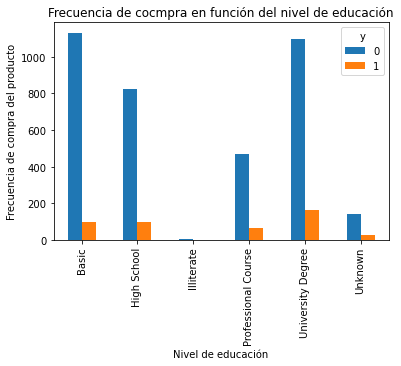

In [17]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de cocmpra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

<AxesSubplot:xlabel='marital'>

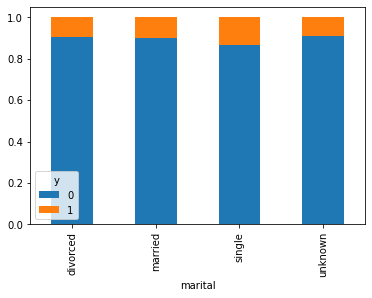

In [18]:
## saber una relación entre compras y si esta casado o no
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

<AxesSubplot:xlabel='day_of_week'>

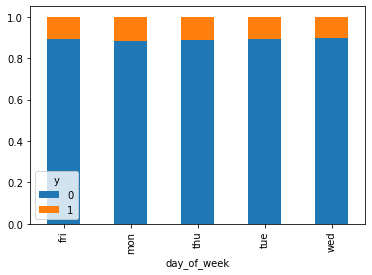

In [19]:
##información de acuerdo a los días de la semana
## saber una relación entre compras y si esta casado o no
table=pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

Text(0, 0.5, 'Frecuencia de compra del producto')

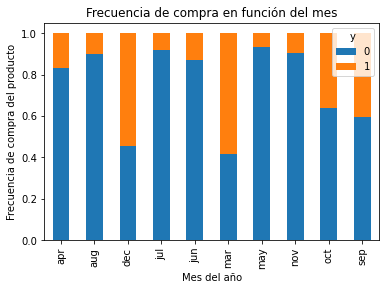

In [20]:
## ver que mes son los que tienen más ventas
## crar una relacion
table=pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

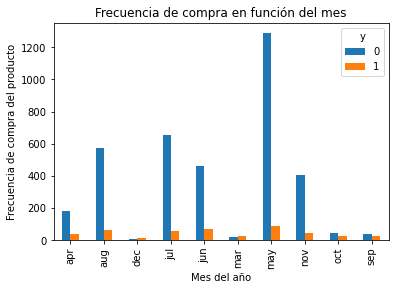

In [21]:
## ver que mes son los que tienen más ventas
## crar una relacion
table=pd.crosstab(data.month, data.y)
table.plot(kind="bar", stacked=False)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Cliente')

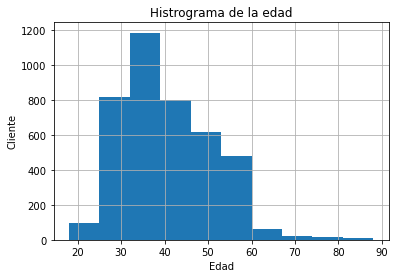

In [22]:
%matplotlib inline
data.age.hist()
plt.title("Histrograma de la edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

<AxesSubplot:xlabel='age'>

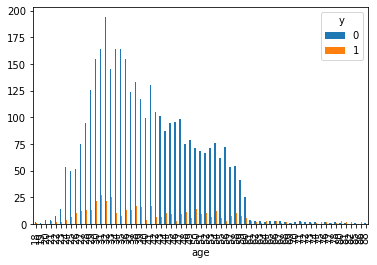

In [23]:
pd.crosstab(data.age, data.y).plot(kind="bar")

<AxesSubplot:xlabel='poutcome'>

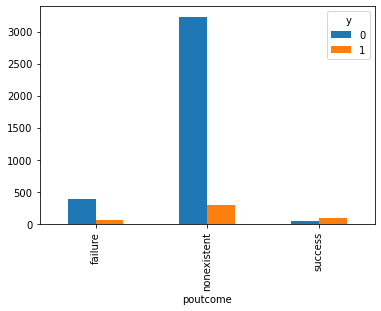

In [24]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

In [25]:
## obtener las variables dummies
categories=["job", "marital", "education", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
for category in categories:
     cat_list="cat_%s"%(category)
     cat_dummies=pd.get_dummies(data[category], prefix=category)
     data=data.join(cat_dummies)

In [26]:
data_vars=data.columns.tolist()
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
    

In [27]:
##crear una lista de columnas sin las columas que no están categorizadas
to_keep= [column for column in data_vars if column not in categories]
to_keep

['age',
 'default',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_High School',
 'education_Illiterate',
 'education_Professional Course',
 'education_University Degree',
 'education_Unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutco

In [28]:
## creamos un datagrame solo con esas columnas 
bank_data=data[to_keep]
bank_data

,age,default,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,no,487,2,999,0,-1.8,92.893,-46.2,1.313,...,0,0,1,0,0,0,0,0,1,0
1,39,no,346,4,999,0,1.1,93.994,-36.4,4.855,...,0,0,1,0,0,0,0,0,1,0
2,25,no,227,1,999,0,1.4,94.465,-41.8,4.962,...,0,0,0,0,0,0,1,0,1,0
3,38,no,17,3,999,0,1.4,94.465,-41.8,4.959,...,0,0,1,0,0,0,0,0,1,0
4,47,no,58,1,999,0,-0.1,93.200,-42.0,4.191,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,no,53,1,999,0,1.4,93.918,-42.7,4.958,...,0,0,0,0,1,0,0,0,1,0
4115,39,no,219,1,999,0,1.4,93.918,-42.7,4.959,...,0,0,1,0,0,0,0,0,1,0
4116,27,no,64,2,999,1,-1.8,92.893,-46.2,1.354,...,0,0,0,1,0,0,0,1,0,0
4117,58,no,528,1,999,0,1.4,93.444,-36.1,4.966,...,0,0,1,0,0,0,0,0,1,0


In [29]:
bank_data_vars=bank_data.columns.tolist()
## variable a predecir
Y=['y']
## todas las columnas excepto la variable a predecir
X=[column for column in bank_data_vars if column not in ['y']]


## Selección de rasgos
Decidir cuales son las variables más significativas para el modelo
>Proceso de quitar y agregar variables para poder aumentar la presición del modelo, partiremos de 12 variables
> 
>Tambien existe una librería que hace ese proceso por nosotros, agrega y quita variables para mostrarnos cuales son las mejores variables para ocupar

In [30]:
## número de variables a ocupar
n=12

In [31]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [32]:
lr=LogisticRegression()

In [33]:
bank_data["default"]=(bank_data["default"]=="yes").astype(int)

C:\Users\Golfa\AppData\Local\Temp/ipykernel_3668/3633004374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data["default"]=(bank_data["default"]=="yes").astype(int)


In [34]:
del bank_data["default"]

In [35]:
X.pop(1)

'default'

In [36]:
## pasamos el modelo que vamos a ocupar junto con el número de variables a ocupar
rfe=RFE(lr, n)
## pasamos las variables predictoras y la variable a predecir
rfe=rfe.fit(bank_data[X], bank_data[Y])

c:\Users\Golfa\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\Users\Golfa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\Golfa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

In [37]:
## variables que son sicnificativas
print(rfe.support_)

[False False False False  True False False False  True False False False
 False False False  True False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
 False False False False False False False  True False  True]


In [38]:
## variables sicnificativas en un ranking
print(rfe.ranking_)

[38 40 18 45  1 17 26 22  1 34  2  8  5 37  7  1  6 24 42  1  1 41 15 28
 27 47 31 12 46 19 30  4  9 14 43 13 20 33 11  3 36 21  1  1  1  1  1 23
 32 44 39 25 29 35 10  1 16  1]


In [39]:
## unir lista booleana con nombres de variables
a=zip(X, rfe.support_, rfe.ranking_)

In [40]:
list(a)

[('age', False, 38),
 ('duration', False, 40),
 ('campaign', False, 18),
 ('pdays', False, 45),
 ('previous', True, 1),
 ('emp.var.rate', False, 17),
 ('cons.price.idx', False, 26),
 ('cons.conf.idx', False, 22),
 ('euribor3m', True, 1),
 ('nr.employed', False, 34),
 ('job_admin.', False, 2),
 ('job_blue-collar', False, 8),
 ('job_entrepreneur', False, 5),
 ('job_housemaid', False, 37),
 ('job_management', False, 7),
 ('job_retired', True, 1),
 ('job_self-employed', False, 6),
 ('job_services', False, 24),
 ('job_student', False, 42),
 ('job_technician', True, 1),
 ('job_unemployed', True, 1),
 ('job_unknown', False, 41),
 ('marital_divorced', False, 15),
 ('marital_married', False, 28),
 ('marital_single', False, 27),
 ('marital_unknown', False, 47),
 ('education_Basic', False, 31),
 ('education_High School', False, 12),
 ('education_Illiterate', False, 46),
 ('education_Professional Course', False, 19),
 ('education_University Degree', False, 30),
 ('education_Unknown', False, 4),
 (

In [41]:
## crear una lista de columnas a utilizar
cols = ["previous", "euribor3m", "job_blue-collar", "job_retired", "month_aug", "month_dec", 
        "month_jul", "month_jun", "month_mar", "poutcome_nonexistent"]

In [42]:
X=bank_data[cols]
Y=bank_data["y"]

## implementación del modelo en pytho con statsmodel.api

In [43]:
import statsmodels.api as sm

In [44]:
## creamos el modelo
logit_model=sm.Logit(Y, X)

In [45]:
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.292239
         Iterations 7


In [46]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.154     
Dependent Variable:   y                 AIC:               2427.4608 
Date:                 2022-06-28 10:09  BIC:               2490.6944 
No. Observations:     4119              Log-Likelihood:    -1203.7   
Df Model:             9                 LL-Null:           -1422.9   
Df Residuals:         4109              LLR p-value:       8.7230e-89
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1018   0.0674  -1.5092 0.1313 -0.2340  0.0304
euribor3m            -0.5852   0.0369 -15.8716 0.0000 -0.6574 -0.5129
job_blue-collar      -0.5257   0.1512  -3.4762 0.0005 -0.8221 -0.2293
job_retired           0.2295   0.2187   1.0495 0.2940 -0.1991  0.6581
month_aug             0.5273   0.1705   3.0931 0.0020  0.1932  0.8614
month_dec             1.0859   0.4478   2.4249 0.0153  0.2082  1.9635
month_jul             0.9344   0.1832   5.1015 0.0000  0.5754  1.2933
month_jun             1.0003   0.1696   5.8974 0.0000  0.6679  1.3328
month_mar             1.6001   0.3126   5.1188 0.0000  0.9874  2.2128
poutcome_nonexistent -0.7702   0.1205  -6.3896 0.0000 -1.0065 -0.5340
=====================================================================

"""

## p valor, contraste de hipotesis, si va a ser o no va a ser nulo, entre más pequeño sea el p valor más sicnificante será esa variable

In [47]:
from sklearn import linear_model

In [48]:
logit_model=linear_model.LogisticRegression()
logit_model.fit(X, Y)

LogisticRegression()

In [49]:
logit_model.score(X, Y)

0.8963340616654528

## si sacamos el promedio y lo restamos de uno sería cuantos casos acertamos si usamos el promedio

In [50]:
## predicción banal sin modelo, sería el promedio es casí cero, por lo tanto 
## predecir siempre 0 nos daría una probabilidad de 1-promedio
Y.mean()

0.10949259529011895

In [51]:
1-Y.mean()

0.8905074047098811

In [52]:
## los valores de la derecha explican como es que tanto incrementan tener una 
## opcion positiva de la derecha las probabilidades el modelo, recordar que son variables binarias
## true y false en algunos casos
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5428901992821994]
1,euribor3m,[-0.5243535653697133]
2,job_blue-collar,[-0.37620153573843734]
3,job_retired,[0.3619839953167128]
4,month_aug,[0.5369879524633633]
5,month_dec,[1.1468477494345135]
6,month_jul,[0.8555544380102296]
7,month_jun,[0.9656228534802477]
8,month_mar,[1.5766112964597554]
9,poutcome_nonexistent,[0.3338689665238188]


Validación del modelo

In [53]:
from sklearn.model_selection import train_test_split

In [61]:
##test_size es el tamaño de la muestra, random_state, es la semilla con la cual hacer los números aleatorios
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3, random_state=0)

In [62]:
lm=linear_model.LogisticRegression()

In [63]:
lm.fit(X_train, Y_train)

LogisticRegression()

In [65]:
probs=lm.predict_proba(X_test)

In [67]:
## son las probabilidades de que suceda tal caso, debemos determinar un porcentaje
## para determinar un umbral para determinar si el porcentaje es falso o verdadero
probs

array([[0.9534864 , 0.0465136 ],
       [0.83120088, 0.16879912],
       [0.92974058, 0.07025942],
       ...,
       [0.66027199, 0.33972801],
       [0.97045642, 0.02954358],
       [0.56771704, 0.43228296]])

In [71]:
from IPython.display import display, Math, Latex

In [72]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))

<IPython.core.display.Math object>

In [73]:
## convertir a respuestas binarias
prediction=lm.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

> Podemos cambiar el umbral, para decidir que es correcto o cual es incorrecto

In [74]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

> El umbral que ocuparemos, será de 0.1 para que sea verdadero

In [77]:
## Creamos un dataframe con los datos de las probabilidades si es 0 o 1
prob_df=pd.DataFrame(probs[:,1])## dataframe solo de los porcentajes
threshold=0.1##umbral para ser verdadero o falso
## mayor a 0.1 es venta=1, y es igual a 0=no venta
prob_df["prediction"]=np.where(prob_df[0]>threshold, 1, 0)
prob_df.head(5)

,0,prediction
0,0.046514,0
1,0.168799,1
2,0.070259,0
3,0.063551,0
4,0.029836,0


In [79]:
## los bancos ya tienen un 10% de probabilidad, saben que de 100 personas consiguen 10% para hacer una compra
## nuestro trabajo es poder aumentar este porcentaje 
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [81]:
## gracias al modelo se pudo aumentar el porcentaje de compra
## lo que hizo el modelo fue predecir cuantos iban a comprar y de eso encontro que el 31% iban a invertir
390/len(prob_df)*100

31.55339805825243

In [85]:
prob_df=pd.DataFrame(probs[:,1])## dataframe solo de los porcentajes
threshold=0.05##umbral para ser verdadero o falso
## mayor a 0.1 es venta=1, y es igual a 0=no venta
prob_df["prediction"]=np.where(prob_df[0]>threshold, 1, 0)
prob_df.head(5)

,0,prediction
0,0.046514,0
1,0.168799,1
2,0.070259,1
3,0.063551,1
4,0.029836,0


In [83]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,587
1,649


In [86]:
649/len(prob_df)*100

52.508090614886726

In [88]:
## saber cuanta diferencia hay entre los datos predichos y los datos que en realidad son
from sklearn import metrics

In [90]:
##90% quiere decir que los datos predichos son muy parecidos acercandose a la realidad
metrics.accuracy_score(Y_test, prediction)

0.9004854368932039

> Conclución: el modelo tiene una probabilidad del 32% aumentado así la probabilidad promedio del 10% si se entrevista al azar

## Validación cruzada

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
## cv son le número de iteraciones a realizar
## scoring es ir guardando el promedio
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)

In [95]:
## los promedios de cada iteración 
scores

array([0.90776699, 0.88834951, 0.90291262, 0.89563107, 0.90048544,
       0.89320388, 0.88349515, 0.89320388, 0.8907767 , 0.88807786])

In [96]:
## el promedio de todas las iteraciones
scores.mean()

0.8943903101599225

## Concluimos que el módelo es bueno por que el promedio de todas las iteracciones es parecido al promedio de cada iteración individual

In [101]:
## cambiamos el número de iteraciones para ver si cambian los promedios o si se mantienen
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=12)
scores, scores.mean() 

(array([0.90406977, 0.89534884, 0.89534884, 0.89504373, 0.90670554,
        0.89504373, 0.89212828, 0.88629738, 0.88921283, 0.89212828,
        0.88921283, 0.88921283]),
 0.8941460720500825)

(array([0.90776699, 0.88834951, 0.90291262, 0.89563107, 0.90048544,
        0.89320388, 0.88349515, 0.89320388, 0.8907767 , 0.88807786]),
 0.8943903101599225)